# Basic Linear Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

Define a synthetic dataset and experiment on it. First, define a `pandas` dataframe with 3 columns using the 3 arrays given below.

In [2]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame(dict(x1 = x1,x2 = x2,y = y))
data

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1
5,9,3,1
6,0,4,-1
7,1,8,-1
8,2,6,-1
9,4,10,-1


Plot the data in axes $x_1$ and $x_2$, highlight 2 classes with different colors, name the axes.

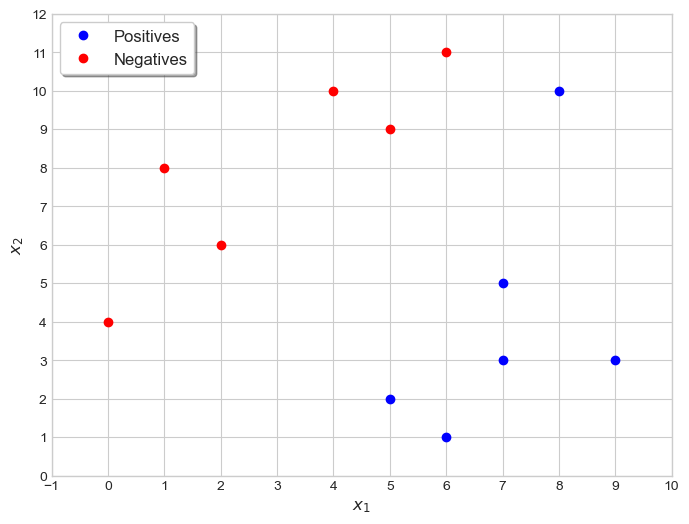

In [3]:
def plot_data(data): 
  plt.figure(figsize=(8, 6))
  plt.plot(data.loc[data.y == 1, 'x1'], data.loc[data.y == 1, 'x2'], 'bo', label = 'Positives')
  plt.plot(data.loc[data.y == -1, 'x1'], data.loc[data.y == -1, 'x2'], 'ro', label = 'Negatives')
  
  min_x1, max_x1 = np.min(data['x1']), np.max(data['x1'])
  min_x2, max_x2 = np.min(data['x2']), np.max(data['x2'])
  
  plt.legend(markerscale = 1, loc = 'upper left', frameon = True, shadow = True, fontsize = 12)
  
  plt.xticks(list(range(min_x1 - 1, max_x1 + 2)))
  plt.yticks(list(range(min_x2 - 1, max_x2 + 2)))
  plt.xlim(min_x1 - 1, max_x1 + 1)
  plt.ylim(min_x2 - 1, max_x2 + 1)
  
  #Specify axis labels using LaTeX
  plt.xlabel('$x_1$', size = 12)
  plt.ylabel('$x_2$', size = 12)

plot_data(data)

Find and highlight in the plot the center of mass for each of the 2 classes as well as the middle point between these centers.

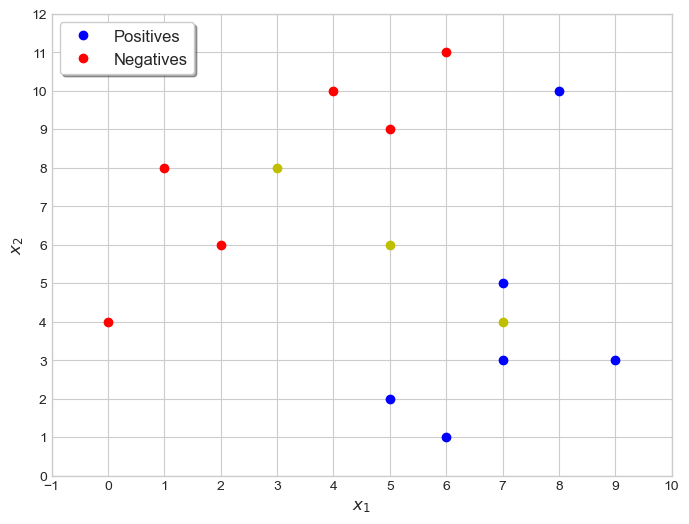

In [4]:
plot_data(data)

positives_mean = data.loc[data.y == 1, ['x1', 'x2']].mean()
negatives_mean = data.loc[data.y == -1, ['x1', 'x2']].mean()
middle = (positives_mean + negatives_mean) / 2

plt.plot(positives_mean[0], positives_mean[1], 'yo')
plt.plot(negatives_mean[0], negatives_mean[1], 'yo')
plt.plot(middle[0], middle[1], 'yo')

plt.show()

Find the equation of the decision boundary line chosen by the Basic Linear Classifier and add it to the plot. 

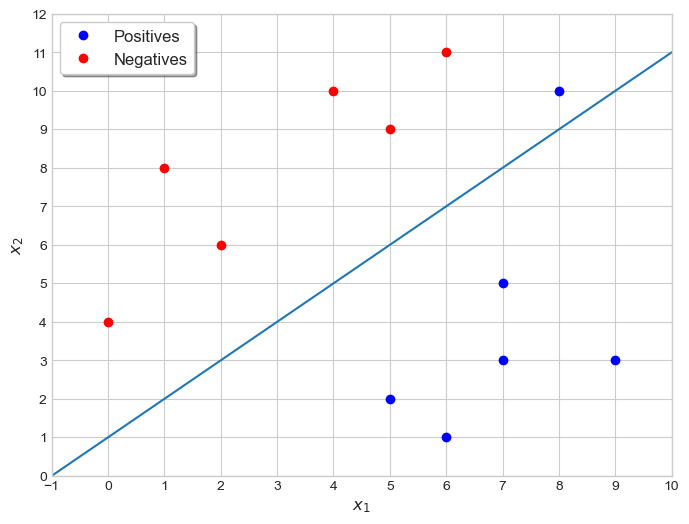

In [5]:
plot_data(data)

weight = positives_mean - negatives_mean
t = weight @ middle
x = np.arange(-5, 15)
plt.plot(x, -weight[0] / weight[1] * x + t / weight[1])

plt.show()